In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)


In [329]:
df = pd.read_csv("CVD_cleaned.csv")

In [330]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


Below further describe the variables and its factor (if applicable):

Age: Age of the patient in years

Sex: Sex of the patient:

M: Male
F: Female
ChestPainType: Chest pain type:

TA: Typical Angina
ATA: Atypical Angina
NAP: Non-Anginal Pain
ASY: Asymptomatic
RestingBP: Resting blood pressure in mm Hg

Cholesterol: Serum cholesterol in mm/dl

FastingBS: Fasting blood sugar:

1: If FastingBS > 120 mg/dl
0: Otherwise
RestingECG: Resting electrocardiogram results:

Normal: Normal
ST: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
LVH: Showing probable or definite left ventricular hypertrophy by Estes’ criteria] MaxHR: Maximum heart rate achieved (Numeric value between 60 and 200)
ExerciseAngina: Exercise-induced angina:

Y: Yes
N: No
Oldpeak: Oldpeak = ST (Numeric value measured in depression)

ST_Slope: The slope of the peak exercise ST segment:

Up: Upsloping
Flat: Flat
Down: Downsloping
HeartDisease: Output/target class:

1: Heart disease
0: Normal


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [332]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [333]:
num_cols = df._get_numeric_data().columns
all_cols = df.columns
cat_cols = list(set(all_cols) - set(num_cols))
df[cat_cols].head(2)

,Diabetes,Sex,Exercise,General_Health,Smoking_History,Heart_Disease,Age_Category,Arthritis,Checkup,Other_Cancer,Skin_Cancer,Depression
0,No,Female,No,Poor,Yes,No,70-74,Yes,Within the past 2 years,No,No,No
1,Yes,Female,No,Very Good,No,Yes,70-74,No,Within the past year,No,No,No


In [334]:
for i in df[cat_cols] :
    print('Value counts for :',i)
    print(df[i].value_counts())
    print('-'*30,"\n")


Value counts for : Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64
------------------------------ 

Value counts for : Sex
Female    160196
Male      148658
Name: Sex, dtype: int64
------------------------------ 

Value counts for : Exercise
Yes    239381
No      69473
Name: Exercise, dtype: int64
------------------------------ 

Value counts for : General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64
------------------------------ 

Value counts for : Smoking_History
No     183590
Yes    125264
Name: Smoking_History, dtype: int64
------------------------------ 

Value counts for : Heart_Disease
No     283883
Yes     24971
Name: Heart_Disease, dtype: int64
------------------------------ 

Valu

## Preprocessing

### Checking for Null Values 

### Checking for duplicates

In [335]:
# Removing duplicates
df = df.groupby(df.columns.tolist(),as_index=False).size()


In [336]:
df.drop('size', axis =1, inplace = True )

In [337]:
#### Converting Target variable HeartDisease to Categorical(1 or 0)
df['Heart_Disease'] = df['Heart_Disease'].map({'Yes' : 1 , 'No' : 0})

In [338]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Excellent,5 or more years ago,No,0,No,No,No,No,No,Female,18-24,147.0,44.00,20.27,No,1.0,12.0,4.0,16.0
1,Excellent,5 or more years ago,No,0,No,No,No,No,No,Female,18-24,152.0,77.11,33.20,No,5.0,15.0,3.0,10.0
2,Excellent,5 or more years ago,No,0,No,No,No,No,No,Female,18-24,157.0,68.04,27.44,No,1.0,20.0,10.0,13.0
3,Excellent,5 or more years ago,No,0,No,No,No,No,No,Female,18-24,163.0,56.70,21.46,No,0.0,2.0,8.0,1.0
4,Excellent,5 or more years ago,No,0,No,No,No,No,No,Female,18-24,165.0,69.85,25.63,No,0.0,8.0,5.0,0.0


### Feature Preprocessing

In [339]:
# BMI Category
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
df['Checkup_Frequency'] = df['Checkup'].replace(checkup_mapping)

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
df = pd.get_dummies(df, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
    
# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

df['BMI_Category'] = df['BMI_Category'].map(bmi_mapping).astype(int)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)    

df = df.drop(["Checkup"],axis=1)


- Transform Age to GenZ, Millenial , Gen X , Baby Boomer 
- Transform Vegetable + Fruits intake
- Transform Skin and Other Cancer into One

In [340]:
df['Height_Weight_Ratio'] = df['Height_(cm)']/df['Weight_(kg)']

In [341]:
import pandas as pd
import numpy as np

def remove_outliers_significantly(data, column, threshold=3.5):
    median = np.median(data[column])
    mad = np.median(np.abs(data[column] - median))

    # Calculate modified Z-scores
    modified_z_scores = 0.6745 * (data[column] - median) / mad

    # Keep only the rows within the threshold
    filtered_data = data[abs(modified_z_scores) <= threshold]

    return filtered_data


# Removing outliers significantly based on the 'Value' column
filtered_df = remove_outliers_significantly(df, column='Height_Weight_Ratio')

print("Original DataFrame:")
print(df.shape)

print("\nDataFrame without outliers:")
print(filtered_df.shape)


Original DataFrame:
(308774, 22)

DataFrame without outliers:
(308029, 22)


### Model Building

In [342]:
df['Cancer'] = np.where((df['Skin_Cancer'] == 1 | (df['Other_Cancer'] == 1)),1,0)
filtered_df['Cancer'] = np.where((filtered_df['Skin_Cancer'] == 1 | (filtered_df['Other_Cancer'] == 1)),1,0)

In [343]:
df.columns

Index(['General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'BMI_Category', 'Checkup_Frequency', 'Sex_Female', 'Sex_Male',
       'Height_Weight_Ratio', 'Cancer'],
      dtype='object')

In [344]:
df = df[['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'BMI_Category', 'Checkup_Frequency', 'Sex_Female', 'Sex_Male',
       'Height_Weight_Ratio', 'Cancer']]

In [345]:
filtered_df = filtered_df[['General_Health', 'Exercise', 'Heart_Disease', 'Depression', 'Diabetes', 'Arthritis', 'Age_Category',
       'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'BMI_Category', 'Checkup_Frequency', 'Sex_Female', 'Sex_Male',
       'Height_Weight_Ratio', 'Cancer']]

### Logistic Regression

In [346]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [347]:
df['Heart_Disease'].value_counts()

0    283803
1     24971
Name: Heart_Disease, dtype: int64

In [348]:
# Separate features (X) and target (y)
X = filtered_df.drop('Heart_Disease', axis=1)
y = filtered_df['Heart_Disease']

from sklearn.preprocessing import StandardScaler
#Scaling the variable:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled ,y, test_size=0.2, random_state=42)

In [349]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)



In [350]:
y_test.value_counts()

0    56682
1     4924
Name: Heart_Disease, dtype: int64

In [351]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(oversampled_X, oversampled_Y)


In [352]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))
y_pred = model.predict(X_test)

0.7391152611566291


CONFUSION MATRIX:


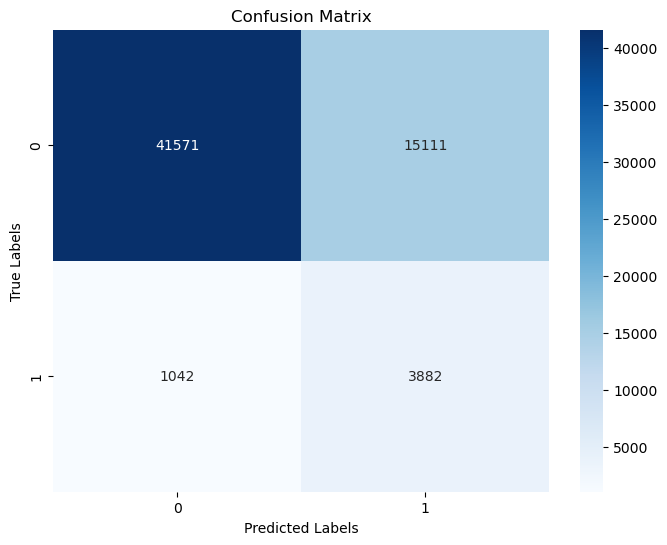

In [353]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [354]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     56682
           1       0.20      0.79      0.32      4924

    accuracy                           0.74     61606
   macro avg       0.59      0.76      0.58     61606
weighted avg       0.91      0.74      0.80     61606



In [355]:
from pandas import Series

weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

General_Health                 -0.677805
Sex_Female                     -0.216596
Alcohol_Consumption            -0.107194
FriedPotato_Consumption        -0.049256
Fruit_Consumption              -0.036650
Green_Vegetables_Consumption   -0.000666
Cancer                          0.007515
Exercise                        0.012516
Height_Weight_Ratio             0.076085
Arthritis                       0.114628
BMI_Category                    0.118723
Depression                      0.132192
Diabetes                        0.169414
Checkup_Frequency               0.203596
Sex_Male                        0.216596
Smoking_History                 0.218221
Age_Category                    1.175098
dtype: float64

In [356]:
# Create a logistic regression model
logreg = LogisticRegression()

# Perform cross-validation
num_folds = 5
cv_scores = cross_val_score(logreg, oversampled_X, oversampled_Y, cv=num_folds)

# Print the cross-validation scores for each fold
for fold_idx, score in enumerate(cv_scores):
    print(f"Fold {fold_idx + 1} Score: {score:.4f}")

# Calculate and print the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print(f"\nMean Cross-Validation Score: {mean_cv_score:.4f}")

# Fit the model to the entire training set
logreg.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = logreg.score(X_test, y_test)
print(f"Test Set Score: {test_score:.4f}")

Fold 1 Score: 0.7675
Fold 2 Score: 0.7694
Fold 3 Score: 0.7693
Fold 4 Score: 0.7742
Fold 5 Score: 0.7719

Mean Cross-Validation Score: 0.7705
Test Set Score: 0.9200


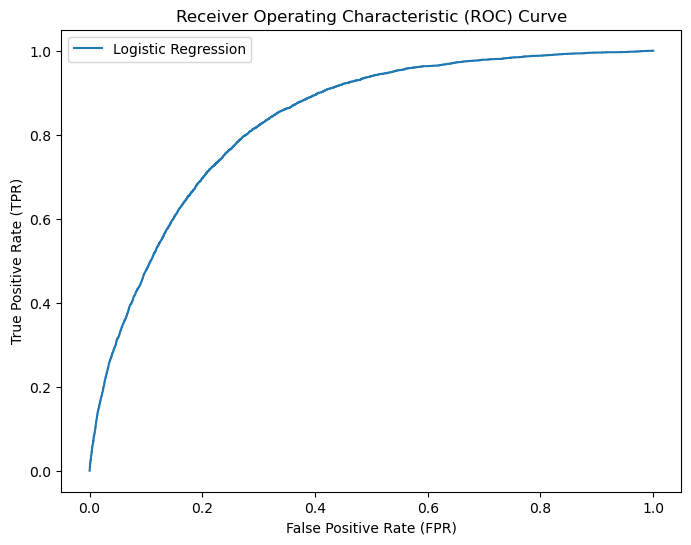

AUC Score: 0.8334


Optimal Threshold: 0.47129081475563595


In [357]:
# Predict probabilities on the test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Find the optimal threshold that maximizes the Youden's J statistic (tpr - fpr)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auclr = round(roc_auc_score(y_test,  y_probs), 4)

print("AUC Score:",auclr)
print("\n")


print("Optimal Threshold:", optimal_threshold)

In [358]:
# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(oversampled_X, oversampled_Y)

# Predict probabilities on the test set

y_probs_pred = logreg.predict_proba(oversampled_X)[:, 1]  # Probabilities of the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Adjust the classification threshold to 0.217
threshold = 0.471
y_train_pred = (y_probs_pred >= threshold).astype(int)
y_pred = (y_probs >= threshold).astype(int)

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(oversampled_Y, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Out sample Accuracy:", accuracy)


# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In-Sample Accuracy: 0.77
Out sample Accuracy: 0.7185176768496575
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     56682
           1       0.20      0.81      0.32      4924

    accuracy                           0.72     61606
   macro avg       0.59      0.76      0.57     61606
weighted avg       0.92      0.72      0.78     61606

Confusion Matrix:
[[40260 16422]
 [  919  4005]]


CONFUSION MATRIX:


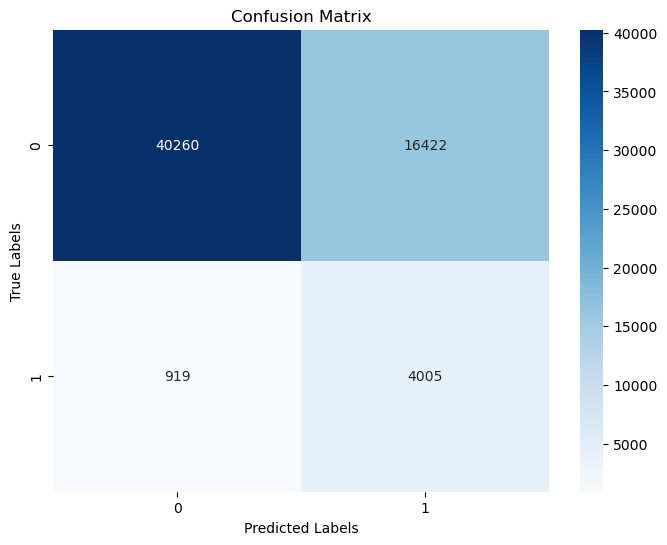

In [363]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [359]:
from pandas import Series

weights = Series(logreg.coef_[0],
                 index=X.columns.values)
temp = pd.DataFrame(weights.sort_values(ascending = False)).reset_index()

In [362]:
temp.columns = ['Column Name' , 'Coefficient Value']
temp['ABS Coefficient Value'] = abs(temp['Coefficient Value'])

In [317]:
temp.columns

Index(['Column Name', 'Coefficient Value', 'ABS Coefficient Value'], dtype='object')

In [322]:
temp.sort_values(by = 'ABS Coefficient Value', ascending = False).reset_index(drop = True).head(10)

,Column Name,Coefficient Value,ABS Coefficient Value
0,Age_Category,1.175098,1.175098
1,General_Health,-0.677805,0.677805
2,Smoking_History,0.218221,0.218221
3,Sex_Female,-0.216596,0.216596
4,Sex_Male,0.216596,0.216596
5,Checkup_Frequency,0.203596,0.203596
6,Diabetes,0.169414,0.169414
7,Depression,0.132192,0.132192
8,BMI_Category,0.118723,0.118723
9,Arthritis,0.114628,0.114628


### Random Forest

In [364]:
# Define the features and target
X = filtered_df.drop('Heart_Disease', axis=1)
y = filtered_df['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [365]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Fit the model to generate the data.
oversampled_X_train, oversampled_y_train = sm.fit_resample(X_train, y_train)
#X_train, X_test, y_train, y_test = train_test_split(oversampled_X_train, oversampled_y_train, test_size=0.2, random_state=42)

In [366]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn import metrics

from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix , roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

import warnings
warnings.simplefilter(action="ignore")

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

In-Sample Accuracy: 0.79
Out-of-Sample Accuracy: 0.74


CONFUSION MATRIX:


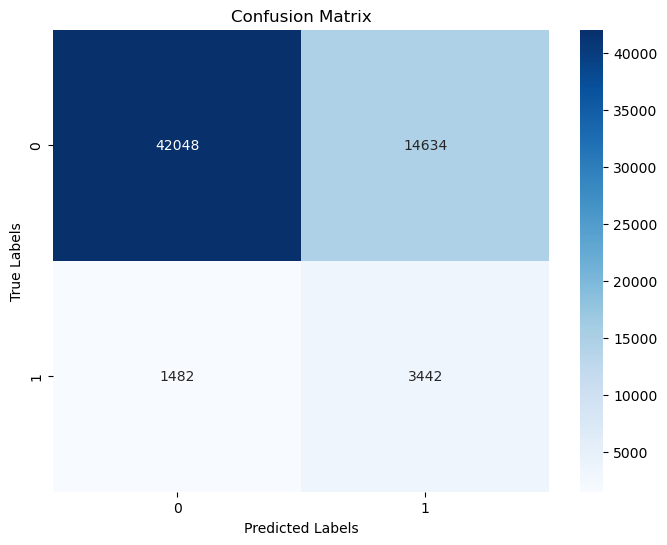

FEATURE IMPORTANCE:


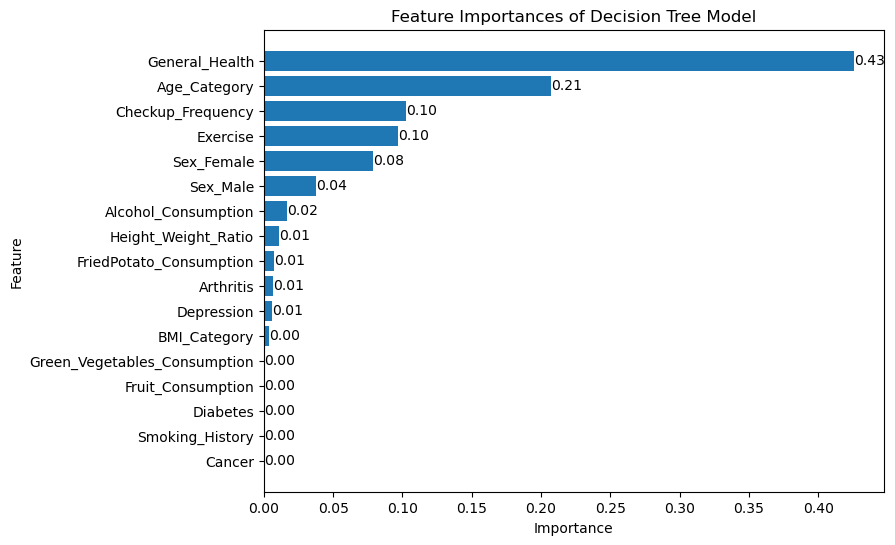

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56682
           1       0.19      0.70      0.30      4924

    accuracy                           0.74     61606
   macro avg       0.58      0.72      0.57     61606
weighted avg       0.90      0.74      0.80     61606

AUC Score: 0.7946


ROC CURVE:


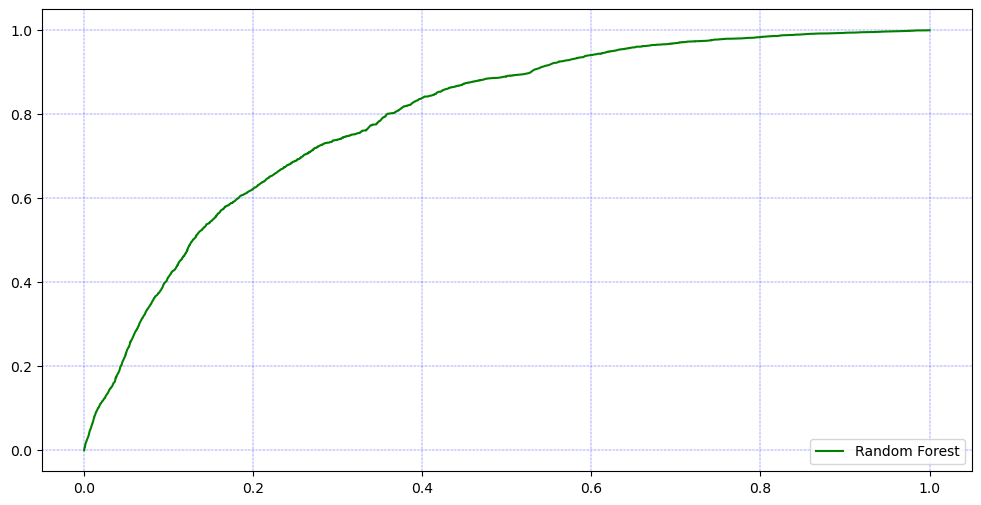

In [384]:
# ** Baseline RF **#

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators = 30, max_depth = 3 , min_samples_split = 5, criterion = 'entropy')
rf.fit(oversampled_X_train, oversampled_y_train)

#Making prediction
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(oversampled_X_train)

#Evaluate Performance -Mean accuracy of Rf in gven data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(oversampled_y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = rf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=rf.predict_proba(X_test)[::,1]

fpr2, tpr2, _a = roc_curve(y_test,  y1_pred_prob)
auc = round(roc_auc_score(y_test,  y1_pred_prob), 4)

print("AUC Score:",auc)
print("\n")
   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr2,tpr2,label="Random Forest",color='green')


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

# XG BOOST

In [385]:
# Define the features and target
X = filtered_df.drop('Heart_Disease', axis=1)
y = filtered_df['Heart_Disease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [386]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Fit the model to generate the data.
oversampled_X_train, oversampled_y_train = sm.fit_resample(X_train, y_train)


In [235]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

In [156]:
scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
eval_metric='logloss', # use logloss to evaluate performance
use_label_encoder=False

In [462]:
# Define the model with default hyperparameters
model = XGBClassifier(learning_rate = 0.01 ,n_estimators = 70,max_depth = 3, eval_metric='logloss', # use logloss to evaluate performance
use_label_encoder=False) # to avoid warning message) 
# Train the model
model.fit(oversampled_X_train, oversampled_y_train)

y_train_pred = model.predict(oversampled_X_train)
# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [463]:
in_sample_accuracy = accuracy_score(oversampled_y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")


In-Sample Accuracy: 0.78
Out-of-Sample Accuracy: 0.69




In [464]:
# Print the classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     56682
           1       0.18      0.81      0.30      4924

    accuracy                           0.69     61606
   macro avg       0.58      0.75      0.55     61606
weighted avg       0.91      0.69      0.76     61606



CONFUSION MATRIX:


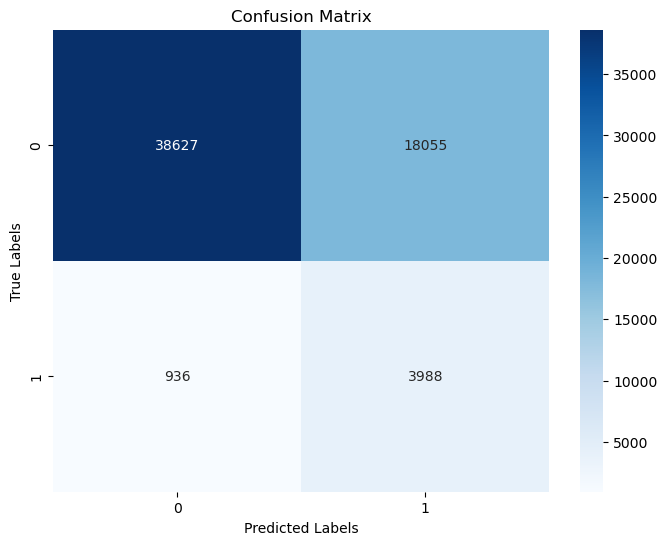

FEATURE IMPORTANCE:


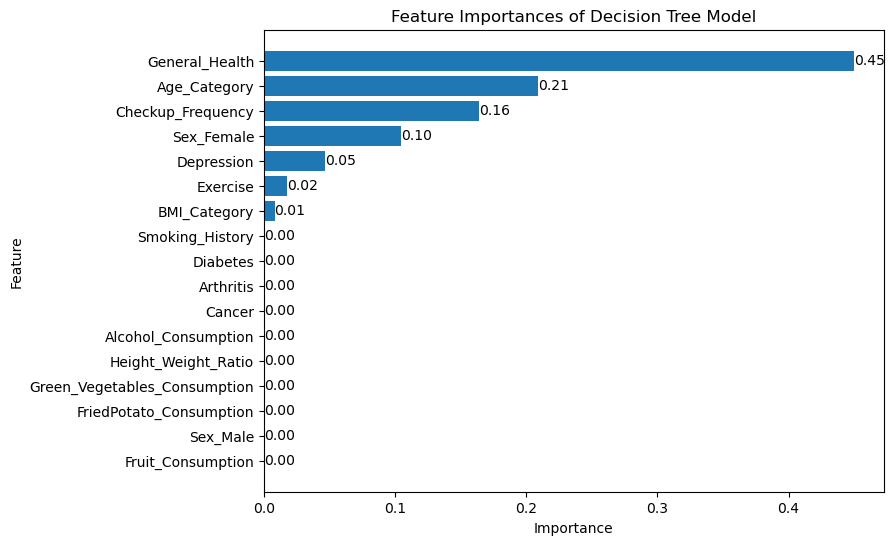

In [466]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Model')
plt.show()

In-Sample Accuracy: 0.78
Out-of-Sample Accuracy: 0.69


CONFUSION MATRIX:


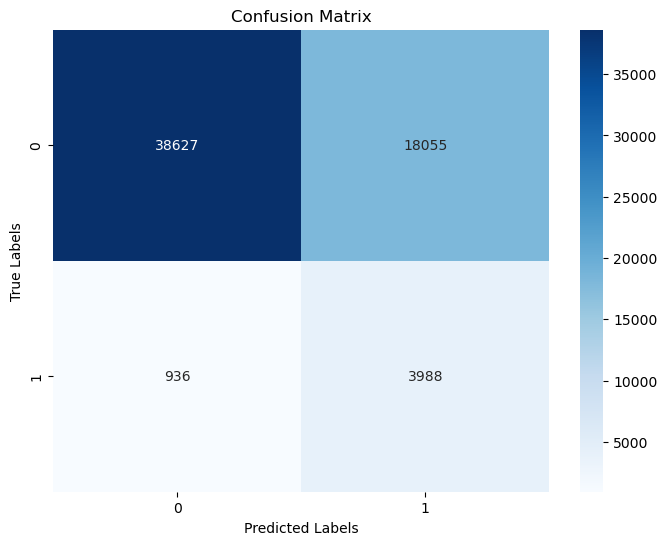

FEATURE IMPORTANCE:


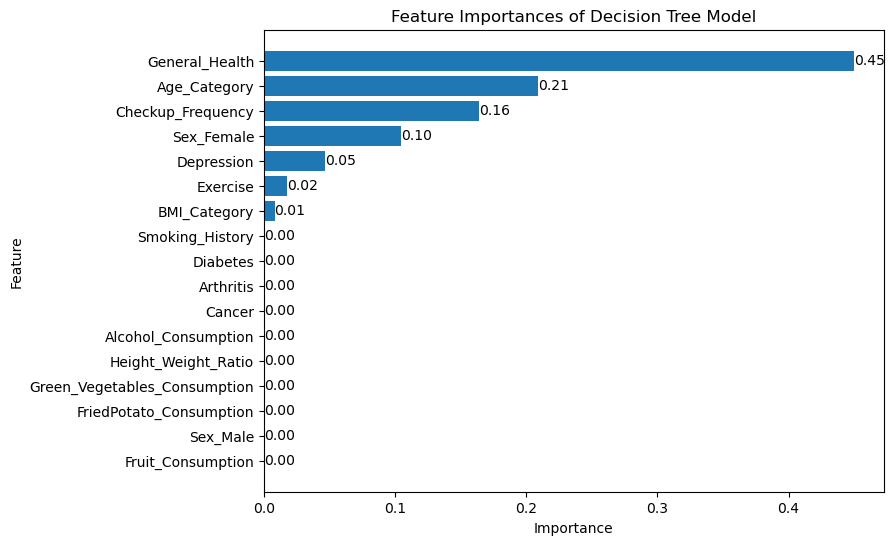

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     56682
           1       0.18      0.81      0.30      4924

    accuracy                           0.69     61606
   macro avg       0.58      0.75      0.55     61606
weighted avg       0.91      0.69      0.76     61606

AUC Score: 0.7946


ROC CURVE:


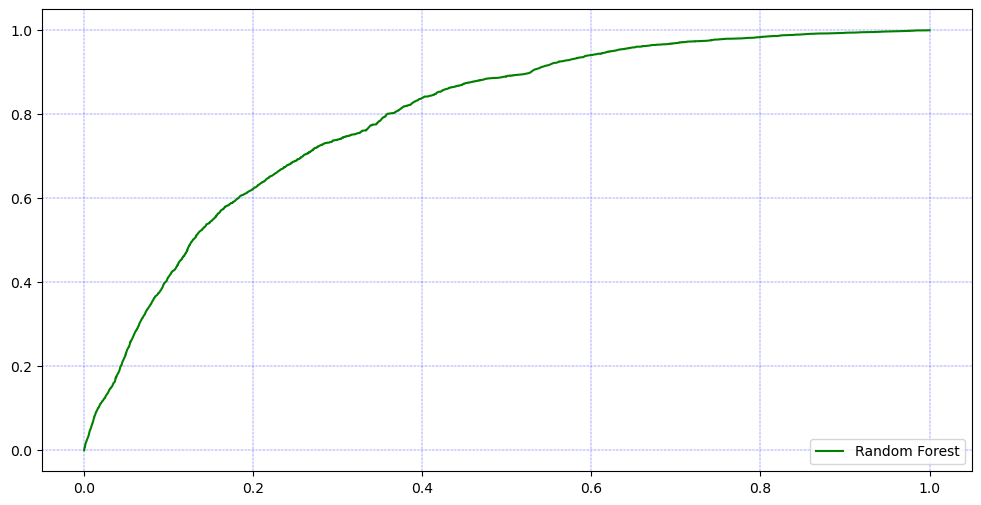

In [467]:

#Making prediction
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(oversampled_X_train)

#Evaluate Performance -Mean accuracy of Rf in gven data

# Calculate in-sample accuracy score
in_sample_accuracy = accuracy_score(oversampled_y_train, y_train_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy:.2f}")

# Calculate out-of-sample accuracy score
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Out-of-Sample Accuracy: {out_of_sample_accuracy:.2f}")
print("\n")

#Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred,labels=[0,1])

#Plot Confusion Matrix
print("CONFUSION MATRIX:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the feature importances from the best model
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=True)

#Plot Feature Importance
print("FEATURE IMPORTANCE:")

# Create a bar plot of the feature importances
plt.figure(figsize=(8, 6))
bars=plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add value annotations to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, i, f"{width:.2f}", color='black', va='center')
    
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Decision Tree Model')
plt.show()

# Calculate different scoring metrics
# Accuracy: Accuracy is the proportion of correctly predicted instances out of the total number of instances. It provides an overall measure of correct predictions.
# Precision: Precision is the proportion of correctly predicted positive instances out of all instances predicted as positive. It measures the model's ability to avoid false positives.
# Recall: Recall is the proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to find all positive instances and avoid false negatives.
# F1 Score: F1 score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall, incorporating both metrics. It is particularly useful when there is an imbalanced class distribution.

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred))

#Calculating ROC_AUC Score
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=rf.predict_proba(X_test)[::,1]

fpr2, tpr2, _a = roc_curve(y_test,  y1_pred_prob)
auc = round(roc_auc_score(y_test,  y1_pred_prob), 4)

print("AUC Score:",auc)
print("\n")
   
#Plot ROC_AUC Curve

import matplotlib.pyplot as plt

print("ROC CURVE:")

plt.figure(figsize=(12,6))
plt.plot(fpr2,tpr2,label="Random Forest",color='green')


plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

In [237]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_test_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

TypeError: 'numpy.float64' object is not callable

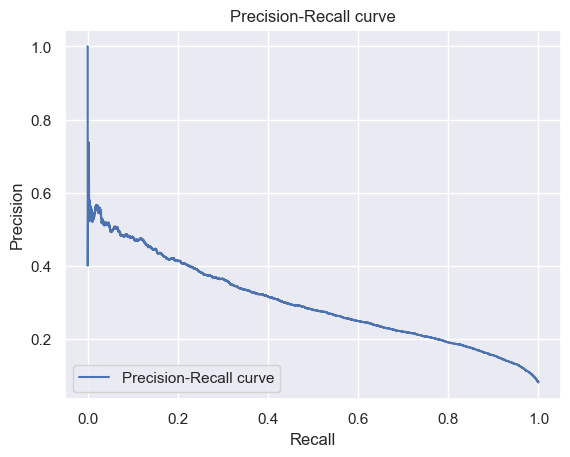

In [ ]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()

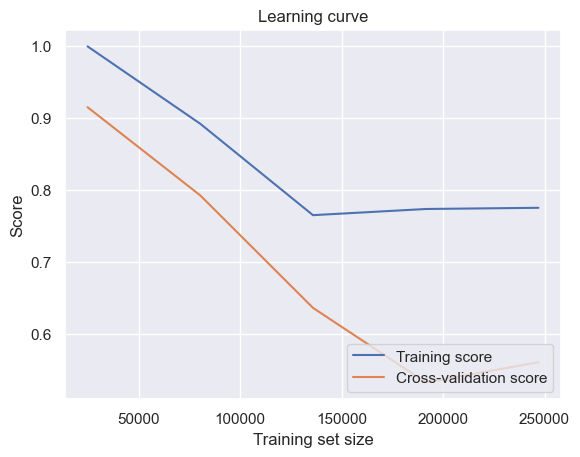

In [ ]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc="lower right")
plt.show()